# Running plan 

The purpose of this project is to be able to plan out my runs until end of the year.

Background:
- I'm new to running and haven't done much cardio before, except in PE classes. My plan is to start slowly, build my aerobic and muscle base for running, and then gradually incorporate more advanced techniques.
- As of September 25th, 2023, I'm currently running 18 kilometers per week.

Good-to-know:
- In running, we usually measure our progress in kilometers (or miles) per week.
- To prevent injury, it's advised not to increase the weekly distance by more than 10%.
- The long run, which is a bit more advanced, shouldn't exceed 40% of the weekly distance.

Notes:
- I'll increase my weekly kilometers by the first digit of my current weekly amount. For example, starting at 18 kilometers means the next week will be 19, following the 10% rule and ensuring I always have a whole number total.
- Up to 30 kilometers per week, I'll maintain my current routine: running 3 times a week on Tuesday, Thursday, and Saturday. The kilometers for each day will be split evenly, with any remainders added to Tuesday when it's 1, or distributed to Tuesday and Thursday when it's 2 (1 kilometer each). This way, the increase is gradual and manageable.
- Once I reach 31 kilometers per week, I'll add a 4th running day, likely on Sunday. This is when I'll introduce the long run. I'll schedule the long run on Tuesday, as Wednesday is a rest day. The remaining kilometers will be spread as evenly as possible across Thursday, Saturday, and Sunday, with any remainders added to Thursday (as it comes after a rest day).

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math

In [2]:
# USING ISO WEEKDAYS: 1 - Monday, 7 - Sunday
START_DATE = dt.date(2023, 9, 25)

# WORKOUT DAYS
WORKOUT_DAYS_3 = [2,4,6]
WORKOUT_DAYS_4 = [2,4,6,7]
EASY_RUN_DAYS = [4,6,7]

# RUNNING INFO
LONG_RUN_MAX_PERCENT = 0.35
LONG_RUN_DAY = 2
START_VOLUME = 18

# CREATE SCHEDULE FOR # OF WEEKS
NUMBER_OF_WEEKS = 14
END_DATE = START_DATE + dt.timedelta(weeks = NUMBER_OF_WEEKS)

## Weekly volume 

In [3]:
# returns the weekly volume based on the current volume 
# increases volume by the first digit of the current volume
def raise_amount(current_volume):
    raise_amt = int(str(current_volume)[0])
    new_volume = current_volume + raise_amt
    
    return new_volume

In [25]:
# creates a dataframe with week numbers and weekly volume
def get_weekly_volume_per_week(): 
    current_volume = START_VOLUME
    current_week = START_DATE.isocalendar()[1]
    end_week = current_week + NUMBER_OF_WEEKS - 1
    data = {current_week: current_volume}
    for week_num in range(current_week+1, end_week+1):
        current_volume = raise_amount(current_volume)
        data[week_num] = current_volume
    
    df = pd.DataFrame(list(data.items()), columns=['week_number', 'weekly_km'])
    return df

In [26]:
week_volume = get_weekly_volume_per_week()
week_volume.tail()

,week_number,weekly_km
9,48,36
10,49,39
11,50,42
12,51,46
13,52,50


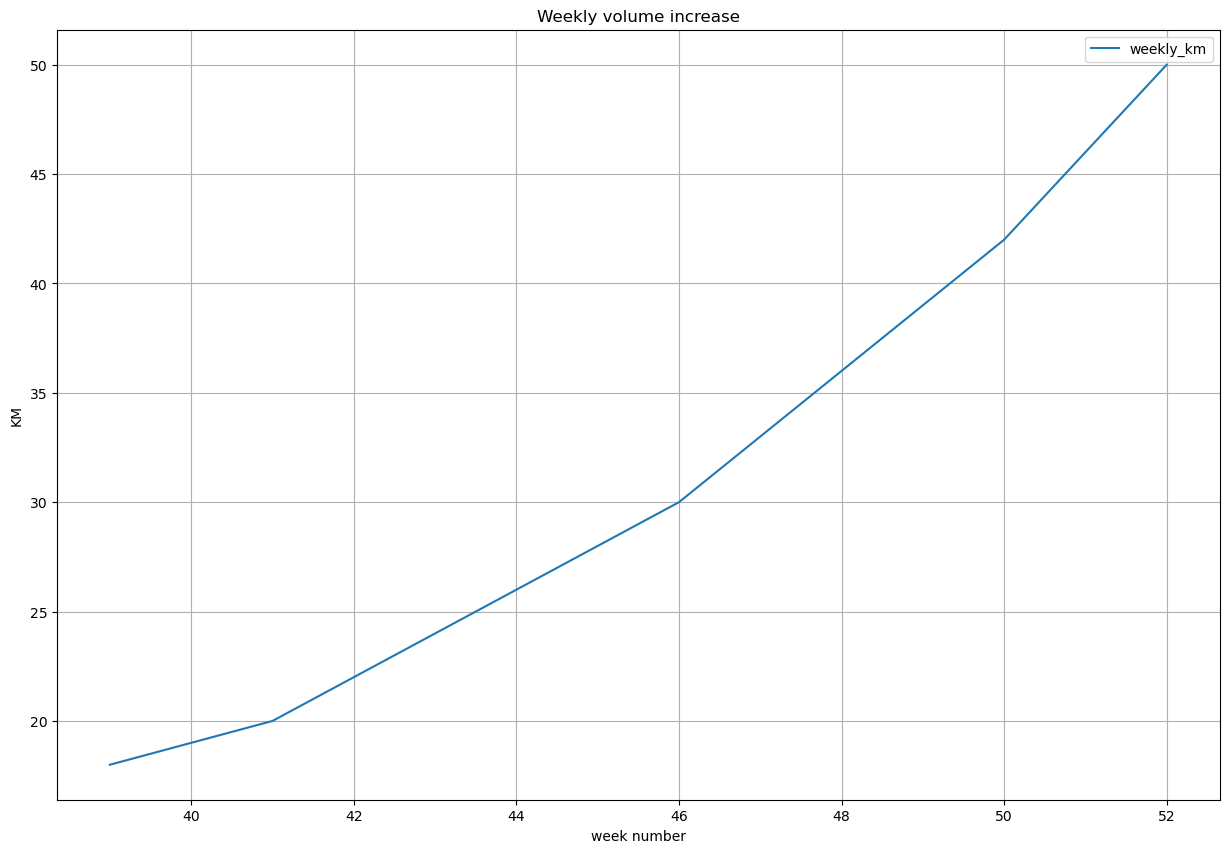

In [27]:
week_volume.plot(x='week_number', y='weekly_km', figsize=(15,10), grid=True)
plt.title('Weekly volume increase')
plt.ylabel('KM')
plt.xlabel('week number')
plt.show()

By the end of the year (week 52), I will run 50 kilometers per week. That's great! When I hit this goal, I'll review my running plan.

## Daily volume

In [7]:
# returns a list of dates from the start to the end date
# end date is excluded
def generate_dates(start_date, end_date):
    dates_list = []
    current_date = start_date

    while current_date < end_date:
        dates_list.append(current_date)
        current_date += dt.timedelta(days=1)

    return dates_list

In [8]:
# returns weekday string name for a date (e.g. Tuesday)
def get_weekday(date):
    return date.strftime('%A')

In [9]:
# return integer - week number in a year for a date (e.g. 31)
def get_week_number(date):
    return int(date.strftime('%W'))

In [10]:
dates_list = generate_dates(START_DATE, END_DATE)

In [11]:
df = pd.DataFrame(dates_list, columns=['date'])

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [13]:
df['weekday'] = df['date'].apply(get_weekday)

In [14]:
df['week_number'] = df['date'].apply(get_week_number)

In [15]:
# merge the main dataframe with weekly volumes
df = df.merge(week_volume, on='week_number')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         98 non-null     datetime64[ns]
 1   weekday      98 non-null     object        
 2   week_number  98 non-null     int64         
 3   weekly_km    98 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ KB


In [17]:
df.head()

,date,weekday,week_number,weekly_km
0,2023-09-25,Monday,39,18
1,2023-09-26,Tuesday,39,18
2,2023-09-27,Wednesday,39,18
3,2023-09-28,Thursday,39,18
4,2023-09-29,Friday,39,18


In [18]:
# based on specified criteria, returns # of km per day 
def get_volume(weekly_km, date):
    weekday = date.isoweekday()

    # under 30km per week, use simple distribution
    if weekly_km <= 30 and weekday in WORKOUT_DAYS_3:
        number_of_days = len(WORKOUT_DAYS_3)
        remainder = weekly_km % number_of_days
        floor_division = weekly_km // number_of_days
        
        if remainder == 0:
            return floor_division

        elif remainder == 1 and weekday == WORKOUT_DAYS_3[0]:
            return floor_division + 1

        elif remainder == 2 and weekday in WORKOUT_DAYS_3[:2]:
            return floor_division + 1

        else:
            return floor_division
    
    # after 30km per week, include long runs
    # rest of km should be distributed fairly simply
    elif weekly_km > 30 and weekday in WORKOUT_DAYS_4:
        long_run_km = math.floor(LONG_RUN_MAX_PERCENT * weekly_km)
        easy_run_km = weekly_km - long_run_km
        
        if weekday == LONG_RUN_DAY:
            return long_run_km
        
        else:
            easy_run_len = len(EASY_RUN_DAYS)
            remainder = easy_run_km % easy_run_len
            floor_division = easy_run_km // easy_run_len
            
            if remainder != 0 and weekday == WORKOUT_DAYS_4[1]:
                return floor_division + remainder
            else:
                return floor_division
                             
    # if not a running day
    else:
        return None       

In [19]:
df['volume'] = df.apply(lambda x: get_volume(x.weekly_km, x.date), axis=1)

In [20]:
# remove days when there's no running
df.dropna(axis=0, inplace=True)

In [21]:
df.tail()

,date,weekday,week_number,weekly_km,volume
90,2023-12-24,Sunday,51,46,10.0
92,2023-12-26,Tuesday,52,50,17.0
94,2023-12-28,Thursday,52,50,11.0
96,2023-12-30,Saturday,52,50,11.0
97,2023-12-31,Sunday,52,50,11.0


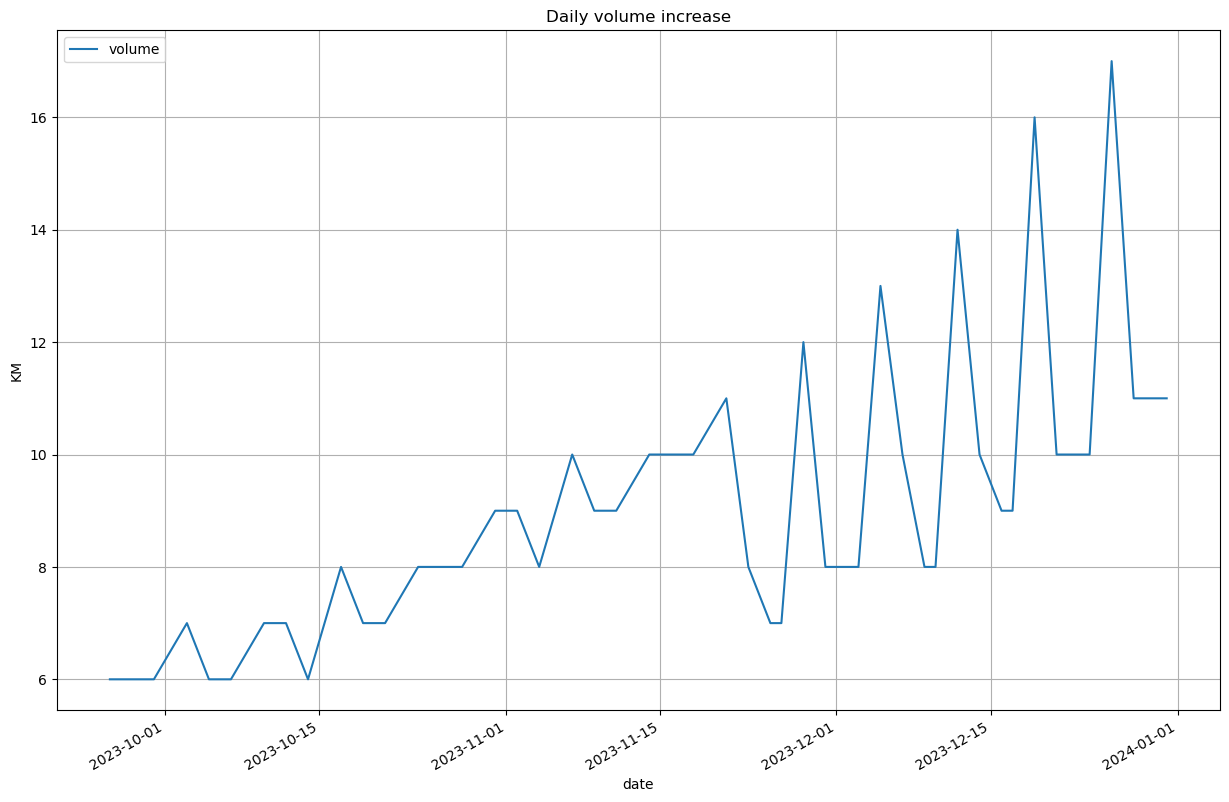

In [22]:
df.plot(x='date', y='volume', figsize=(15,10), grid=True)
plt.title('Daily volume increase')
plt.ylabel('KM')
plt.xlabel('date')
plt.show()

In the beginning, the daily increase in volume is gradual. Even when the long runs are introduced and the graph fluctuates due to them comprising more than 30% of the weekly volume, the overall increase is still present.

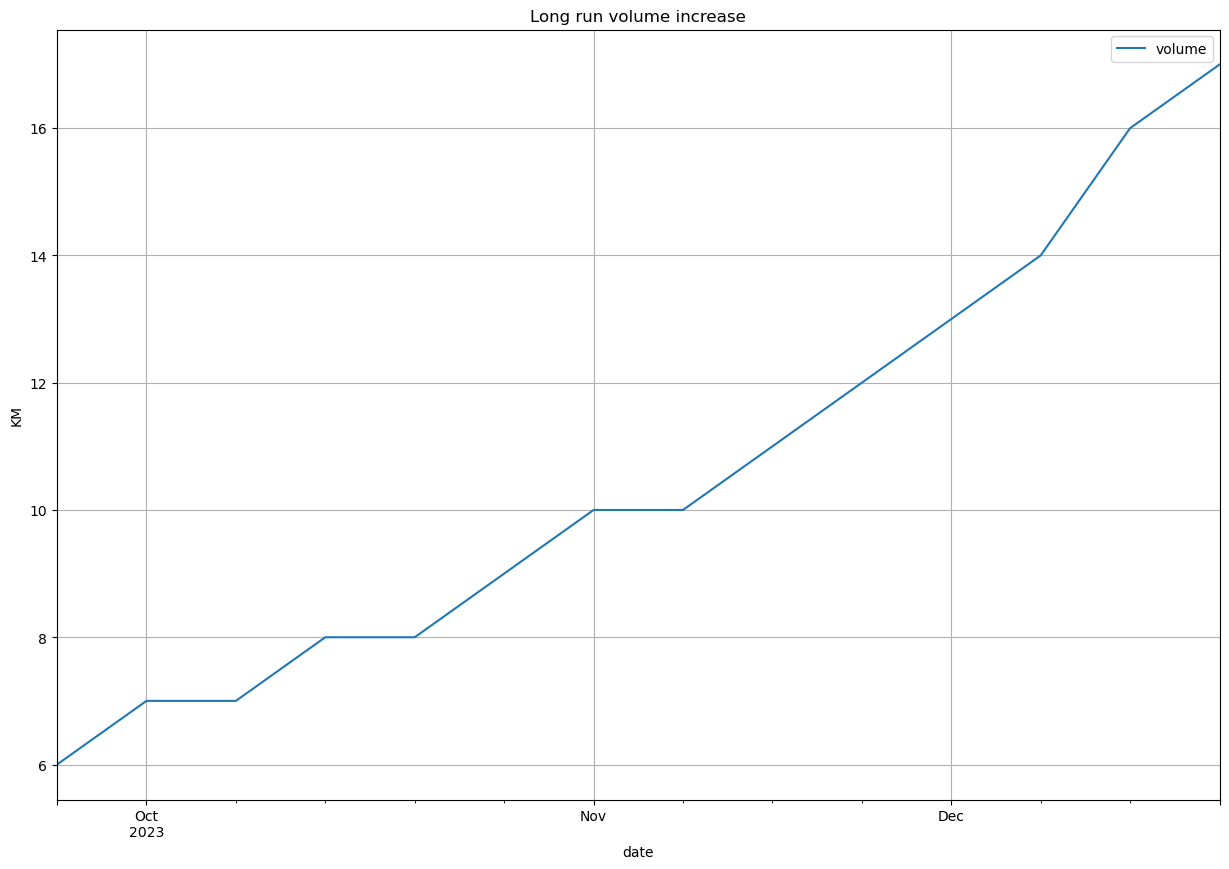

In [23]:
(
    df[df['date']
    .apply(lambda x: x.isoweekday()) == LONG_RUN_DAY]
    .plot(x='date', y='volume', figsize=(15,10), grid=True)
)
plt.title('Long run volume increase')
plt.ylabel('KM')
plt.xlabel('date')
plt.show()

Just interesting to look at.

### The final plan

The daily detailed plan is below.

In [24]:
df.head(100)

,date,weekday,week_number,weekly_km,volume
1,2023-09-26,Tuesday,39,18,6.0
3,2023-09-28,Thursday,39,18,6.0
5,2023-09-30,Saturday,39,18,6.0
8,2023-10-03,Tuesday,40,19,7.0
10,2023-10-05,Thursday,40,19,6.0
12,2023-10-07,Saturday,40,19,6.0
15,2023-10-10,Tuesday,41,20,7.0
17,2023-10-12,Thursday,41,20,7.0
19,2023-10-14,Saturday,41,20,6.0
22,2023-10-17,Tuesday,42,22,8.0


In the end, I'll transfer this plan to a magnetic fridge calendar each month. With the Strava app, I'll easily track my adherence to the plan. Having everything ready and set up is reassuring.